# To analyze shelter usage based on the program model: 'emergency' & 'transitional'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
toronto_shelter_df = pd.read_csv('INF2178_A1_data.csv')

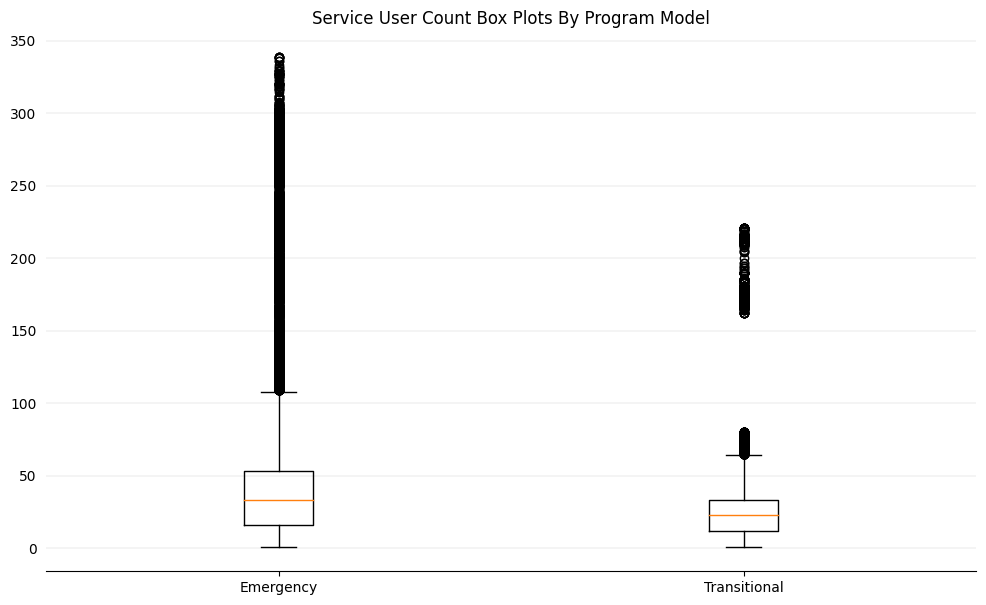

In [2]:
# Setting up boxplot
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Service User Count Box Plots By Program Model')

# Extract data for program model
emergency_data = toronto_shelter_df[toronto_shelter_df['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
transitional_data = toronto_shelter_df[toronto_shelter_df['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']

# Boxplot with labels
ax.boxplot([emergency_data, transitional_data], labels=['Emergency', 'Transitional'])

plt.show()

In [3]:
# Descriptive statistics for 'Emergency'and 'Transitional'
def get_summary_statistics(dataset, program_model):
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)

    print(f'Program Model: {program_model}')
    print('Min:', min_value)
    print('Max:', max_value)
    print('Median:', median)
    print('Mean:', mean)

# Print summary statistics for emergency & transitional program model
get_summary_statistics(emergency_data, 'Emergency')
get_summary_statistics(transitional_data, 'Transitional')

Program Model: Emergency
Min: 1
Max: 339
Median: 33.0
Mean: 49.06
Program Model: Transitional
Min: 1
Max: 221
Median: 23.0
Mean: 30.99


In [4]:
# Welch's t-test
t_stat, p_val = ttest_ind(emergency_data, transitional_data, equal_var=False)
print('Welch\'s t-test result :', t_stat)
print('p-value:', p_val)

Welch's t-test result : 38.85174699254652
p-value: 0.0


In [5]:
# Two-sample t-test for 'Emergency' and 'Transitional'
t_stat, p_val = ttest_ind(emergency_data, transitional_data, equal_var=True)
print('Two-sample t-test result :', t_stat)
print('p-value:', p_val)

Two-sample t-test result : 29.937570467283667
p-value: 3.1720139638162956e-195


# To analyze the service user count between the 'men' and 'women' sectors

In [6]:
import seaborn as sns

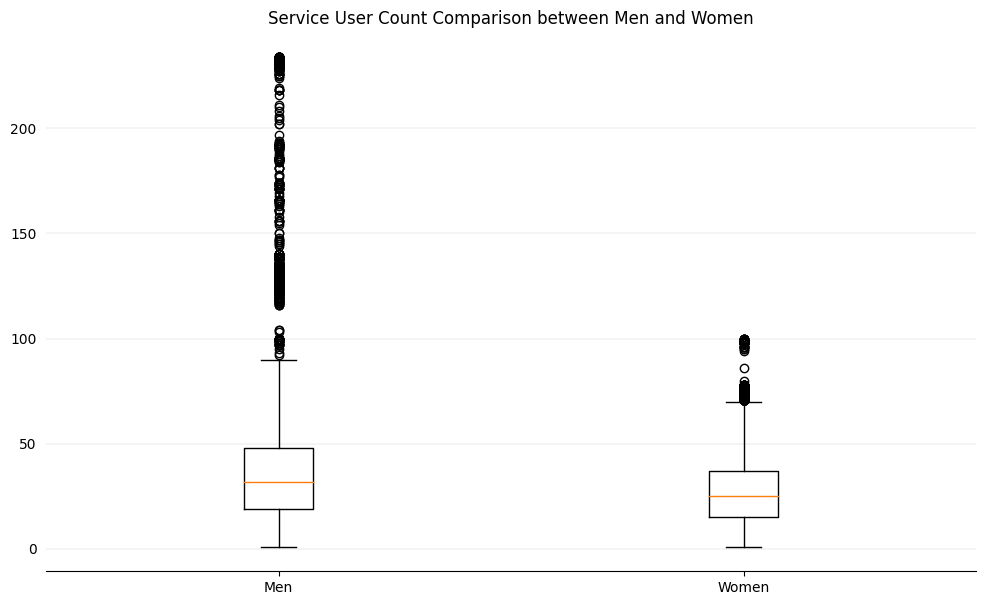

In [7]:
# setting boxplot
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Service User Count Comparison between Men and Women')

# Extract data for program model
men_data = toronto_shelter_df[toronto_shelter_df['SECTOR'] == 'Men']['SERVICE_USER_COUNT']
women_data = toronto_shelter_df[toronto_shelter_df['SECTOR'] == 'Women']['SERVICE_USER_COUNT']

# Boxplot with labels
ax.boxplot([men_data, women_data], labels=['Men', 'Women'])

plt.show()

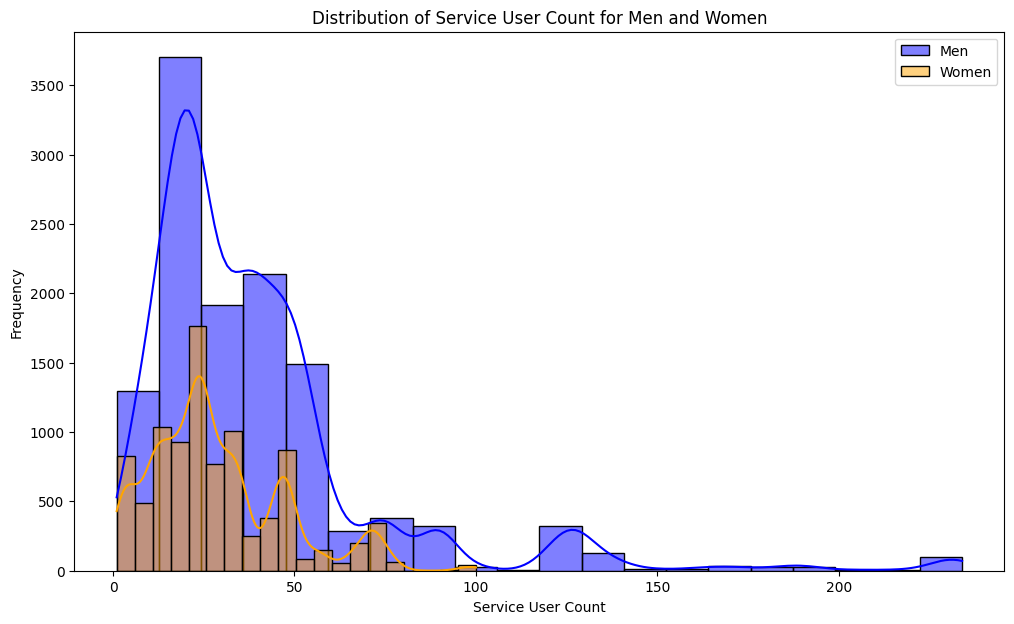

In [8]:
plt.figure(figsize=(12, 7))

# Histogram for 'men' service user count
sns.histplot(toronto_shelter_df[toronto_shelter_df['SECTOR'] == 'Men']['SERVICE_USER_COUNT'], bins=20, kde=True, color='blue', label='Men')

# Histogram for 'women' service user count
sns.histplot(toronto_shelter_df[toronto_shelter_df['SECTOR'] == 'Women']['SERVICE_USER_COUNT'], bins=20, kde=True, color='orange', label='Women')

plt.title('Distribution of Service User Count for Men and Women')
plt.xlabel('Service User Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [9]:
# Descriptive statistics for 'Men'and 'Women'
def get_summary_statistics(dataset, sector):
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)

    print(f'sector: {sector}')
    print('Min:', min_value)
    print('Max:', max_value)
    print('Median:', median)
    print('Mean:', mean)

# Print summary statistics for emergency & transitional program model
get_summary_statistics(men_data, 'Men')
get_summary_statistics(women_data, 'Women')

sector: Men
Min: 1
Max: 234
Median: 32.0
Mean: 39.87
sector: Women
Min: 1
Max: 100
Median: 25.0
Mean: 28.66


In [10]:
# Welch's t-test
t_stat, p_val = ttest_ind(men_data, women_data, equal_var=False)
print('\nWelch\'s t-statistic =', str(t_stat))
print('p-value =', str(p_val))


Welch's t-statistic = 30.50421164151915
p-value = 1.0532742925183108e-199


In [11]:
# Two-sample t-test
t_stat, p_val = ttest_ind(men_data, women_data, equal_var=True)
print('Two-sample t-test result:', t_stat)
print('p-value:', p_val)

Two-sample t-test result: 28.24955042305982
p-value: 2.022346382679794e-172


# To analyze shelter occupancy trends on a monthly basis over time

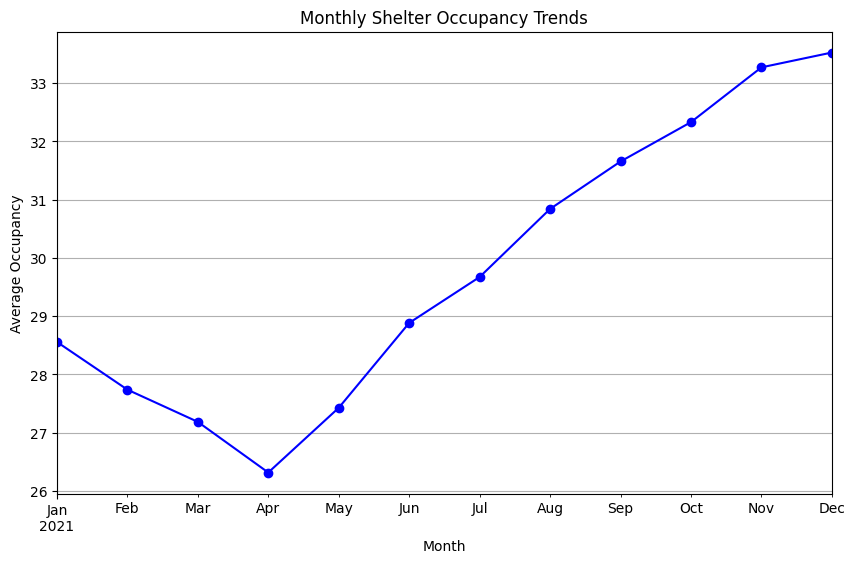

In [12]:
# Convert 'occupancy_date' to datetime
toronto_shelter_df['OCCUPANCY_DATE'] = pd.to_datetime(toronto_shelter_df['OCCUPANCY_DATE'])

# Set 'occupancy_date' as the index
toronto_shelter_df.set_index('OCCUPANCY_DATE', inplace=True)

# Resample data on a monthly basis
monthly_occupancy = toronto_shelter_df['OCCUPIED_BEDS'].resample('M').mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_occupancy.plot(marker='o', linestyle='-', color='b')
plt.title('Monthly Shelter Occupancy Trends')
plt.xlabel('Month')
plt.ylabel('Average Occupancy')
plt.grid(True)
plt.show()

# To analyze occupancy between different capacity type ('room based' and 'bed based')

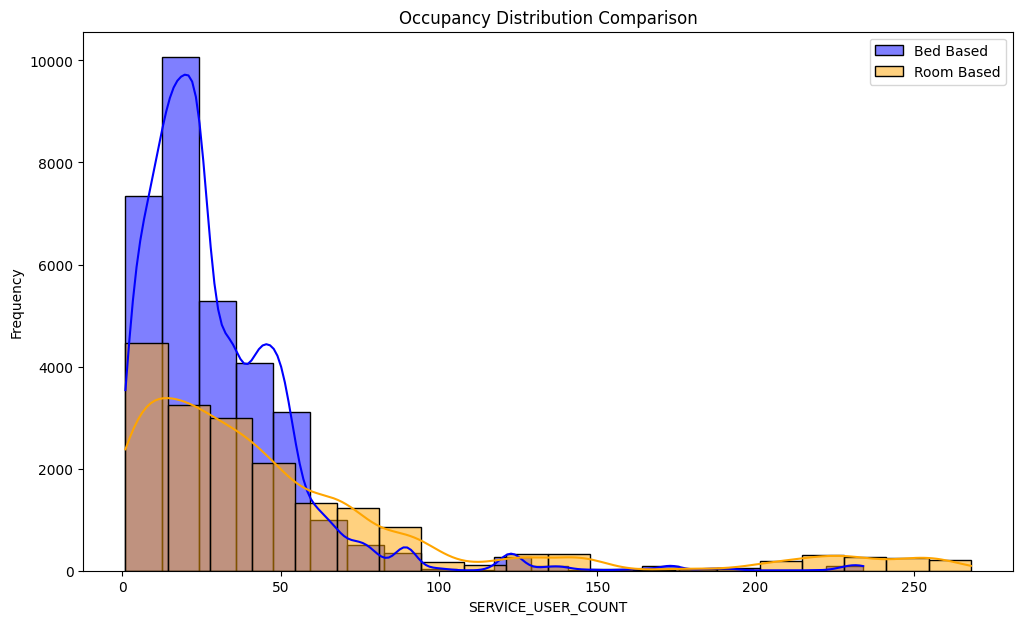

In [13]:
plt.figure(figsize=(12, 7))

# Extract data for capacity type
bed_data = toronto_shelter_df[toronto_shelter_df['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPIED_BEDS']
room_data = toronto_shelter_df[toronto_shelter_df['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPIED_ROOMS']

# Histogram for 'bed based' capacity type
sns.histplot(toronto_shelter_df[toronto_shelter_df['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPIED_BEDS'], bins=20, kde=True, color='blue', label='Bed Based')

# Histogram for 'room based' service user count
sns.histplot(toronto_shelter_df[toronto_shelter_df['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPIED_ROOMS'], bins=20, kde=True, color='orange', label='Room Based')

plt.title('Occupancy Distribution Comparison')
plt.xlabel('SERVICE_USER_COUNT')
plt.ylabel('Frequency')
plt.legend()
plt.show()

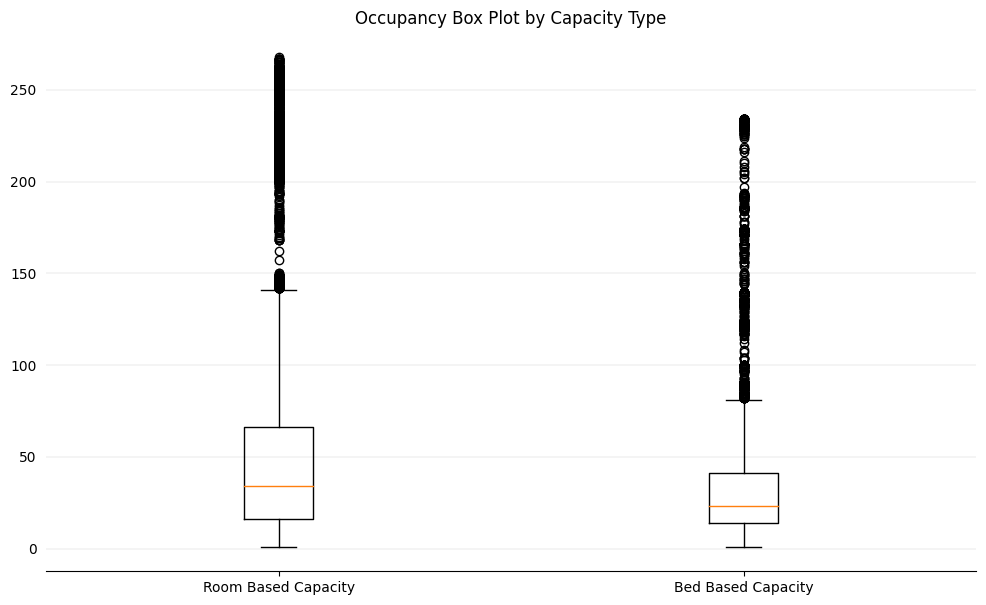

In [14]:
# Setting up boxplot
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')

ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Occupancy Box Plot by Capacity Type')

# Extract data for capacity type
rooms_data = toronto_shelter_df[toronto_shelter_df['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPIED_ROOMS']
beds_data = toronto_shelter_df[toronto_shelter_df['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPIED_BEDS']

# Boxplot with labels
ax.boxplot([rooms_data, beds_data], labels=['Room Based Capacity', 'Bed Based Capacity'])

plt.show()

<ipython-input-15-8ccd24e7a713>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = toronto_shelter_df.corr()


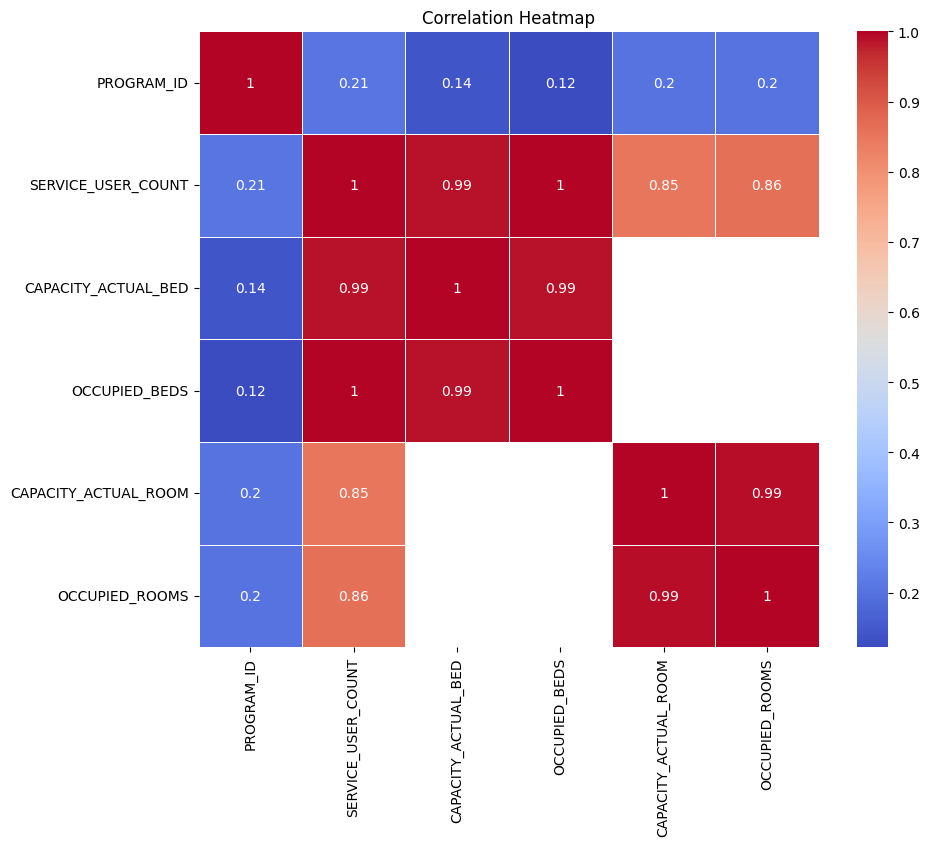

In [15]:
# Setting up heatmap
correlation_matrix = toronto_shelter_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
# Descriptive statistics for 'bed based'and 'room based'
def get_summary_statistics(dataset, capacity_type):
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)

    print(f'capacity type: {capacity_type}')
    print('Min:', min_value)
    print('Max:', max_value)
    print('Median:', median)
    print('Mean:', mean)

# Print summary statistics for emergency & transitional program model
get_summary_statistics(room_data, 'Room Based Capacity')
get_summary_statistics(bed_data, 'Bed Based Capacity')

capacity type: Room Based Capacity
Min: 1.0
Max: 268.0
Median: 34.0
Mean: 52.8
capacity type: Bed Based Capacity
Min: 1.0
Max: 234.0
Median: 23.0
Mean: 29.78


In [17]:
# Welch's t-test
t_stat, p_val = ttest_ind(room_data, bed_data, equal_var=False)
print('\nWelch\'s t-statistic =', str(t_stat))
print('p-value =', str(p_val))


Welch's t-statistic = 50.48695539984032
p-value = 0.0


In [18]:
# Two-sample t-test
t_stat, p_val = ttest_ind(room_data, bed_data, equal_var=True)
print('Two-sample t-test result:', t_stat)
print('p-value:', p_val)

Two-sample t-test result: 60.61420516535203
p-value: 0.0
